In [1]:
from fundamental_functions import *
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from photutils import CircularAperture
from photutils import aperture_photometry
import numpy as np

In [2]:
# The data
cube2 = 'FINAL_DATACUBE.fits'
hdu2 = F.open(cube2)
data = hdu2[1].data

In [3]:
#QSO redshift
zqso = 3.006

#Wavelength slice (in pixels) for PSF fitting/subtraction
wave_slice=120

#Central wavelength for PSF fitting (ang)
lamcen_psf =  6198.0

#PSF flux scaling box size (pix)
r_psf_scale = 6

#PSF subtraction box size (pix)
#Ideally 5x seeing
r_psf_sub = 15

#Velocity search window (wrt LyA; km/s)
vmin=-11000.0/1.5
vmax=5000.0

In [4]:
nw, nx, ny = data.shape
initial_lamb = hdu2[1].header['CRVAL3']

wavearr = np.arange(0.0, nw,1.0) * 1.25 + initial_lamb
ind1_lamcen_psf = int(1120 - wave_slice/2.0)
ind2_lamcen_psf = int(1120 + wave_slice/2.0)

print(wavearr[ind1_lamcen_psf], wavearr[ind2_lamcen_psf])

6075.4140625 6225.4140625


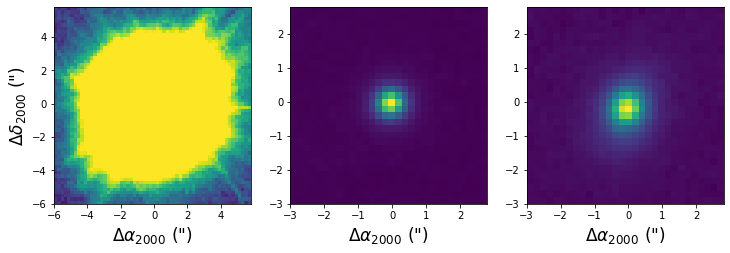

In [5]:
# Selecting the stars :D
x_s1 = 303
y_s1 = 303

x_s2 = 240
y_s2 = 188

x_s3 = 122
y_s3 = 323

star1_off = data[ind1_lamcen_psf:ind2_lamcen_psf, (y_s1-r_psf_sub*2):(y_s1+r_psf_sub*2), 
               (x_s1-r_psf_sub*2):(x_s1+r_psf_sub*2)].sum(axis=0)*1.25

star2_off = data[ind1_lamcen_psf:ind2_lamcen_psf, (y_s2-r_psf_sub):(y_s2+r_psf_sub), 
               (x_s2-r_psf_sub):(x_s2+r_psf_sub)].sum(axis=0)*1.25

star3_off = data[ind1_lamcen_psf:ind2_lamcen_psf, (y_s3-r_psf_sub):(y_s3+r_psf_sub), 
               (x_s3-r_psf_sub):(x_s3+r_psf_sub)].sum(axis=0)*1.25

x = np.arange(-15,15)*0.2
y = np.arange(-15,15)*0.2
x2 = np.arange(-30,30)*0.2
y2 = np.arange(-30,30)*0.2

plt.figure(figsize=(12,8))

plt.subplot(131)
plt.imshow(star1_off, origin='lower', extent=[x2[0],x2[-1],y2[0],y2[-1]])
plt.xlabel(r'$\Delta \alpha_{2000}$ (")', fontsize=17)
plt.ylabel(r'$\Delta \delta_{2000}$ (")', fontsize=17)
plt.clim(-100,1000)

plt.subplot(132)
plt.imshow(star2_off, origin='lower', extent=[x[0],x[-1],y[0],y[-1]])
plt.xlabel(r'$\Delta \alpha_{2000}$ (")', fontsize=17)

plt.subplot(133)
plt.imshow(star3_off, origin='lower', extent=[x[0],x[-1],y[0],y[-1]])

plt.xlabel(r'$\Delta \alpha_{2000}$ (")', fontsize=17)
plt.show()

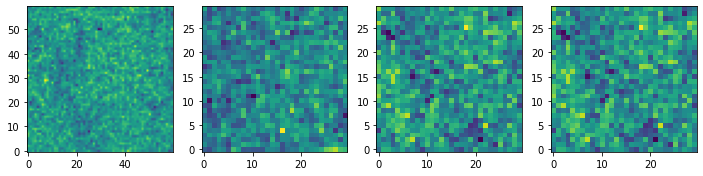

In [9]:
# Measurement of RMS sky noise near every star
sky1 = data[1:241, (y_s1-r_psf_sub*2-10):(y_s1+r_psf_sub*2-10), 
               (x_s1-r_psf_sub*2-100):(x_s1+r_psf_sub*2-100)].sum(axis=0)*1.25

sky2 = data[1:241, (y_s2-r_psf_sub-10):(y_s2+r_psf_sub+-10), 
               (x_s2-r_psf_sub-30):(x_s2+r_psf_sub-30)].sum(axis=0)*1.25

sky3 = data[1:241, (y_s3-r_psf_sub):(y_s3+r_psf_sub), 
               (x_s3-r_psf_sub+50):(x_s3+r_psf_sub+50)].sum(axis=0)*1.25

sky4 = data[1:241, (y_s3-r_psf_sub):(y_s3+r_psf_sub), 
               (x_s3-r_psf_sub+50):(x_s3+r_psf_sub+50)].sum(axis=0)*1.25       # QSO sky! 
 
RMS1 = np.sqrt(np.mean(sky1**2))
RMS2 = np.sqrt(np.mean(sky2**2))
RMS3 = np.sqrt(np.mean(sky3**2))


plt.figure(figsize=(12,8))
plt.subplot(141)
plt.imshow(sky1, origin='lower')
plt.subplot(142)
plt.imshow(sky2, origin='lower')
plt.subplot(143)
plt.imshow(sky3, origin='lower')
plt.subplot(144)
plt.imshow(sky4, origin='lower')
plt.show()

In [10]:
# Fitting
X, Y = np.meshgrid(x,y)
X2, Y2 = np.meshgrid(x2,y2)
xdata = np.vstack((X.ravel(),Y.ravel()))
xdata2 = np.vstack((X2.ravel(),Y2.ravel()))

In [ ]:
f = lambda X, A, x_off, y_off,alpha_x, alpha_y, beta, off_set: moffat_integrated_func(X, A, x_off, y_off,alpha_x, alpha_y, beta,off_set, Ns=60)

param1, cov1 = curve_fit(f, xdata2, star1_off.ravel(), p0=p0)
print('Terminó el primer fit :D')

param2, cov2 = curve_fit(moffat_integrated_func, xdata, star2_off.ravel(), p0=p0)
print('Terminó el 2do fit :D')

param3, cov3 = curve_fit(moffat_integrated_func, xdata, star3_off.ravel(), p0=p0)
print('Terminó el tercer fit :D')

In [11]:
# Previously found parameters: 
param1 = np.array([3.48502226e+08, -1.12297134e-01, -3.54697347e-02,  5.11584076e-01, 5.26599340e-01,  2.24434034e+00, 0.])
param2 = np.array([4.55544783e+05, -1.93387190e-02, -3.04570226e-02, -5.09779583e-01, 5.26201887e-01,  2.27797444e+00, 0.])
param3 = np.array([1.82898132e+05, -1.88034975e-01, -5.90714589e-02, -6.47519030e-01, 5.61422674e-01,  1.63870390e+00, 0.])

In [13]:
A1, x_off1, y_off1, alpha_x1, alpha_y1, beta1, off_set1 = param1
A2, x_off2, y_off2, alpha_x2, alpha_y2, beta2, off_set1 = param2
A3, x_off3, y_off3, alpha_x3, alpha_y3, beta3, off_set1 = param3

psf_s1 = moffat_integrated_func(xdata2, A1, x_off1, y_off1, alpha_x1, alpha_y1, beta1, off_set1 ,delta_x=0.2, delta_y=0.2, method='scipy', Ns=60)
psf_s2 = moffat_integrated_func(xdata, A2, x_off2, y_off2, alpha_x2, alpha_y2, beta2, off_set1 ,delta_x=0.2, delta_y=0.2, method='scipy', Ns=30)
psf_s3 = moffat_integrated_func(xdata, A3, x_off3, y_off3, alpha_x3, alpha_y3, beta3, off_set1 ,delta_x=0.2, delta_y=0.2, method='scipy', Ns=30)

psf_s1 = psf_s1.reshape(60,60)
psf_s2 = psf_s2.reshape(30,30)
psf_s3 = psf_s3.reshape(30,30)

In [15]:
# Getting the centers of each PSF
psfcen_1 = np.argwhere(psf_s1 == np.max(psf_s1))[0]
psfcen_2 = np.argwhere(psf_s2 == np.max(psf_s2))[0]
psfcen_3 = np.argwhere(psf_s3 == np.max(psf_s3))[0]

#Get wavelenth of LyA at QSO redshift
wLyA = 1215.6701 * (1.0+zqso) 
#Create a search windown using minimum/maximm velocities; convert to wavelength
wmin = (1+vmin/2.998e5)*wLyA
wmax = (1+vmax/2.998e5)*wLyA

#Get indicies of this serach windown
windmin = 1
windmax = 161

#Get indicies in steps of wavelength slice
winds = np.arange(windmin, windmax, wave_slice)

#Create a fake, broadband PSF-subtracted image
sum_img1 = np.zeros((4*r_psf_sub, 4*r_psf_sub))
sum_img2 = np.zeros((2*r_psf_sub, 2*r_psf_sub))
sum_img3 = np.zeros((2*r_psf_sub, 2*r_psf_sub))

print(wmin, wmax)

4750.851185940005 4951.194807868179


In [19]:
sub_img1, img_1, norm1 = flux_scaling(psf_s1, y_s1, x_s1, sum_img1, psfcen_1, winds, wave_slice, data, 2*r_psf_sub, 2*r_psf_scale)
sub_img2, img_2, norm2 = flux_scaling(psf_s2, y_s2, x_s2, sum_img2, psfcen_2, winds, wave_slice, data, r_psf_sub, r_psf_scale)
sub_img3, img_3, norm3 = flux_scaling(psf_s3, y_s3, x_s3, sum_img3, psfcen_3, winds, wave_slice, data, r_psf_sub, r_psf_scale)

MemoryError: Unable to allocate 2.82 GiB for an array with shape (3682, 451, 456) and data type float32

In [22]:
winds

array([  1, 121])